In [8]:
import re
import os
def getEpochLoss(data):
    pattern = r"Epoch (\d+)/\d+,\sLoss: ([\d.]+)"
    matches = re.findall(pattern, data)
    if matches:
        epoch = matches[0][0]
        loss = matches[0][1]
        return epoch,loss
    return None,None

log_folder = '../log'
# 获取log文件夹下的所有文件
log_files = [f for f in os.listdir(log_folder) if os.path.isfile(os.path.join(log_folder, f))]
data = []
for file_name in log_files:
    parts = file_name.split("_")
    print(parts)
    large_batch = int(parts[2])  # 提取大批量大小并将其转换为整数
    small_batch = int(parts[3].split(".")[0])  # 提取小批量大小并将其转换为整数
    file_path = os.path.join(log_folder, file_name)
    if 'loss' in file_name:
        with open(file_path, 'r') as file:
             lines = file.readlines()
             epoches = []
             losses = []
             for line in lines:
                 epoch,loss = getEpochLoss(line)
                 if epoch is not None and loss is not None:
                     epoches.append(epoch)
                     losses.append(loss)

             data.append([[large_batch,small_batch],epoches,losses])
print(data)

['BERT', 'SST2', '32', '8.log']
['BERT', 'SST2', '16', '8.log']
['resnet50', 'cifar10', '32', '32.log']
['resnet50', 'cifar10', '256', '256.log']
['resnet50', 'cifar10', '256', '256', 'loss.log']
['vgg19', 'cifar10', '32', '32.log']
['BERT', 'SST2', '32', '16.log']
['BERT', 'SST2', '16', '16.log']
['vgg19', 'cifar10', '512', '256.log']
['vgg19', 'cifar10', '256', '64.log']
['resnet50', 'cifar10', '512', '32.log']
['resnet50', 'cifar10', '256', '32', 'loss.log']
['resnet50', 'cifar10', '64', '64.log']
['vgg19', 'cifar10', '64', '64.log']
['vgg19', 'cifar10', '128', '64.log']
['BERT', 'SST2', '8', '8.log']
['BERT', 'SST2', '4', '4.log']
['resnet50', 'cifar10', '256', '128', 'loss.log']
['vgg19', 'cifar10', '256', '256.log']
['vgg19', 'cifar10', '512', '32.log']
['resnet50', 'cifar10', '256', '64.log']
['resnet50', 'cifar10', '512', '256.log']
['resnet50', 'cifar10', '128', '64.log']
['vgg19', 'cifar10', '256', '128.log']
['vgg19', 'cifar10', '256', '32.log']
['resnet50', 'cifar10', '512'

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.9617183371161928, 0.40116539612716556, 0.18587788905264163, 0.10930295455820706, 0.08481245122051664, 0.0632702685341391, 0.058602037373930216, 0.046053105556615154, 0.04491584987987821, 0.04114362568480476, 0.031128970219525605, 0.027071031183479543, 0.03572769970538057, 0.030191476499585777, 0.025506992785174553]
[1.092235514390034, 0.5968517332658962, 0.4137894226213106, 0.29001979879863315, 0.21247885608241218, 0.1553343625069475, 0.1149079360184632, 0.09169808200900743, 0.08186214400348996, 0.0705363767642989, 0.057134607730457775, 0.04824303497437576, 0.04577174101097709, 0.04391514602009539, 0.043555298193334945]
[0.9657764208438756, 0.43436035986446664, 0.2207943677254345, 0.12825086321252996, 0.09322242084842966, 0.07590093342182429, 0.06282424972966656, 0.05465486908898405, 0.04427200938096208, 0.03807374258356555, 0.03506387769878196, 0.03485941134757646, 0.03247933806625226, 0.03163392476343295, 0.029492587769342125]
[1

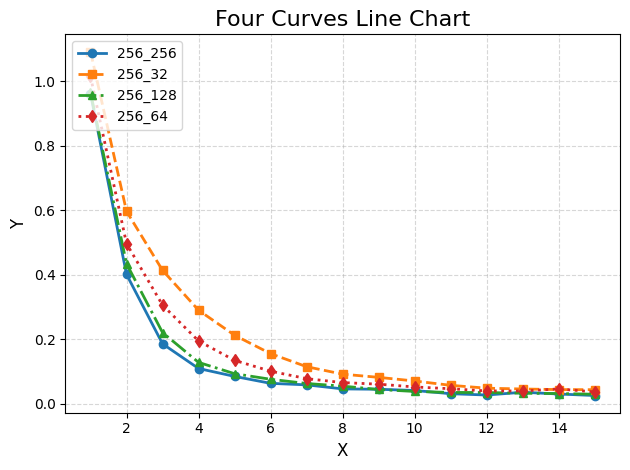

In [25]:
import matplotlib.pyplot as plt
# # test 曲线数据
# x = [1, 2, 3, 4, 5]  # x轴数据
# y1 = [1, 4, 9, 16, 25]  # 曲线1的y轴数据
# y2 = [1, 2, 4, 8, 16]  # 曲线2的y轴数据
# y3 = [1, 3, 5, 7, 9]  # 曲线3的y轴数据
# y4 = [2, 4, 6, 8, 10]  # 曲线4的y轴数据
x = [int(x) for x in data[0][1]]
y1 = [float(x) for x in data[0][2]]
y2 = [float(x) for x in data[1][2]]
y3 = [float(x) for x in data[2][2]]
y4 = [float(x) for x in data[3][2]]
print(x)
print(y1)
print(y2)
print(y3)
print(y4)

# 绘制折线图
plt.plot(x, y1, label=f'{data[0][0][0]}_{data[0][0][1]}', marker='o', linestyle='-', linewidth=2)
plt.plot(x, y2, label=f'{data[1][0][0]}_{data[1][0][1]}', marker='s', linestyle='--', linewidth=2)
plt.plot(x, y3, label=f'{data[2][0][0]}_{data[2][0][1]}', marker='^', linestyle='-.', linewidth=2)
plt.plot(x, y4, label=f'{data[3][0][0]}_{data[3][0][1]}', marker='d', linestyle=':', linewidth=2)

# 图表标题和坐标轴标签
plt.title('Four Curves Line Chart', fontsize=16)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)

# 坐标轴刻度标签字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 设置图例位置和样式
plt.legend(loc='upper left', fontsize=10)

# 网格线
plt.grid(True, linestyle='--', alpha=0.5)

# 调整图表边距
plt.tight_layout()

plt.savefig('loss.pdf')

# 显示图表
plt.show()
